In [ ]:
## VIVEK GUSAIN(2022PHZ8539)
## ABHISHEK KUMAR(2022PHZ8453)

In [1]:
## Treating field as classical and matter as quantum

using Pkg

In [217]:
Pkg.add("DifferentialEquations")
Pkg.add("ParameterizedFunctions")
Pkg.add("Latexify")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


    Updating `~/.julia/environments/v1.8/Project.toml`
  [23fbe1c1] + Latexify v0.15.18
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [6]:
using DifferentialEquations
using ParameterizedFunctions
using Plots


ArgumentError: ArgumentError: Package ParameterizedFunctions not found in current path.
- Run `import Pkg; Pkg.add("ParameterizedFunctions")` to install the ParameterizedFunctions package.

In [7]:

coupled_ode = @ode_def quantum_optics begin
    da = -im *  ω * a  - im *  g/2 * conj(c₂) * c₁
    dc₁ = -im * ωₛ / 2 * c₁  - im * g/2 * a * c₂
    dc₂ = -im * g/2 * conj(a) * c₁ + im *  ωₛ / 2 * c₂ 
end ω g ωₛ 


LoadError: LoadError: UndefVarError: @ode_def not defined
in expression starting at c:\Users\vivek gusain\Downloads\JC_model (1).ipynb:2

In [4]:
u₀ = Complex{Float64}[(0.0 + im*1.0)/sqrt(2), 0, 1]
## p = 1.0 , x = 0.0
tspan = (0.0, 200.0)
p = [1,0.001, 2]
## coupling constant g = 0.001
## omega (spin system) = 2
## omega (Oscillator) = 1
prob = ODEProblem(coupled_ode, u₀, tspan, p)

sol = solve(prob,Rodas4P())
#abstol=1e-6,reltol=1e-6)
nt2 = length(sol.t)
c1 = zeros(nt2)
c2 = zeros(nt2)
a = zeros(nt2)
c_total = zeros(nt2)
x = zeros(nt2)
p = zeros(nt2)
σ_z = zeros(nt2)
σₓ = zeros(nt2)
σ_y = zeros(nt2)

for i in 1:nt2
    a[i] = abs(sol.u[i][1])
    c1[i] = sqrt(conj(sol.u[i][2]) * sol.u[i][2])
    c2[i] = sqrt(conj(sol.u[i][3]) * sol.u[i][3])
    c_total[i] = sqrt(c1[i]*c1[i] + c2[i]*c2[i])
    x[i] = (sol.u[i][1] + conj(sol.u[i][1]))/sqrt(2)
    p[i] = sqrt(2) * im * (sol.u[i][1] - conj(sol.u[i][1]) )
    σ_z[i]  = (conj(sol.u[i][2]) * sol.u[i][2] - conj(sol.u[i][3]) * sol.u[i][3])/c_total[i]
    σₓ[i] = conj(sol.u[i][2]) * sol.u[i][3] + conj(sol.u[i][3]) * sol.u[i][2]
    σ_y[i] = -im * conj(sol.u[i][2]) * sol.u[i][3] + im * conj(sol.u[i][3]) * sol.u[i][2]
end

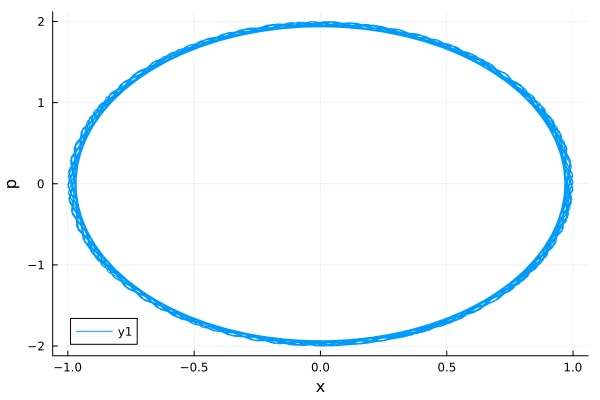

In [5]:
plot(x, p, xlabel="x", ylabel="p")

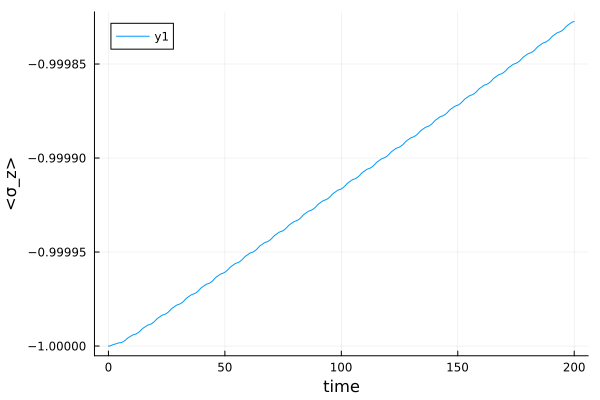

In [6]:
plot(sol.t, σ_z, xlabel="time", ylabel="<σ_z>")

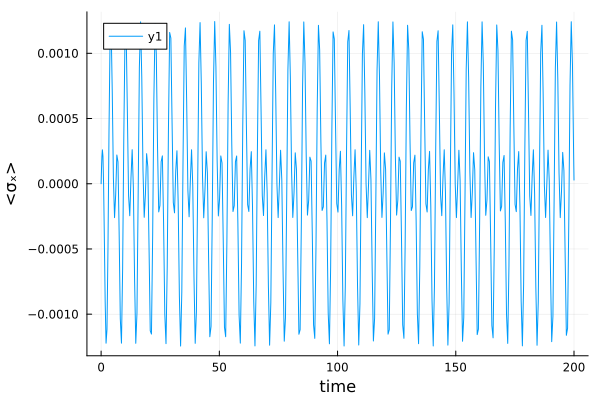

In [8]:
plot(sol.t, σₓ, xlabel="time", ylabel="<σₓ>")

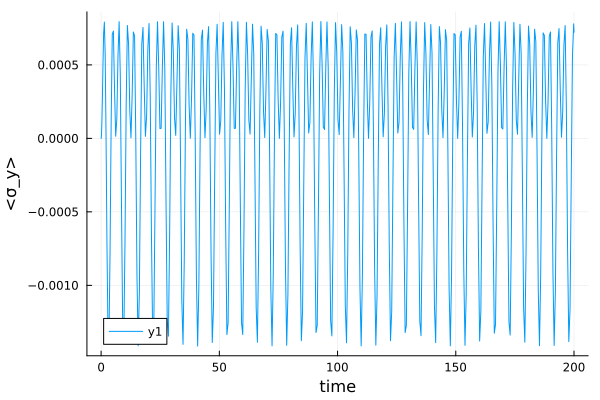

In [9]:
plot(sol.t, σ_y, xlabel="time", ylabel="<σ_y>")

In [ ]:
## Treating both field and matter as quantum

In [3]:
using QuantumOptics
using PyPlot

In [5]:
# Parameters
N_cutoff = 10

ωc = 0.1
ωa = 0.1
Ω = 1.

1.0

In [6]:
# Bases
b_fock = FockBasis(N_cutoff)
b_spin = SpinBasis(1//2)
b = b_fock ⊗ b_spin

[Fock(cutoff=10) ⊗ Spin(1/2)]

In [7]:
# Fundamental operators
a = destroy(b_fock)
at = create(b_fock)
n = number(b_fock)

sm = sigmam(b_spin)
sp = sigmap(b_spin)
sz = sigmaz(b_spin)
sx = sigmax(b_spin)
sy = sigmay(b_spin)

# Hamiltonian
Hatom = ωa*sz/2
Hfield = ωc*n
Hint = Ω*(at⊗sm + a⊗sp)
H = one(b_fock)⊗Hatom + Hfield⊗one(b_spin) + Hint

Operator(dim=22x22)
  basis: [Fock(cutoff=10) ⊗ Spin(1/2)]sparse([1, 13, 2, 14, 3, 15, 4, 16, 5, 17  …  6, 18, 7, 19, 8, 20, 9, 21, 10, 22], [1, 1, 2, 2, 3, 3, 4, 4, 5, 5  …  18, 18, 19, 19, 20, 20, 21, 21, 22, 22], ComplexF64[0.05 + 0.0im, 1.0 + 0.0im, 0.15000000000000002 + 0.0im, 1.4142135623730951 + 0.0im, 0.25 + 0.0im, 1.7320508075688772 + 0.0im, 0.35000000000000003 + 0.0im, 2.0 + 0.0im, 0.45 + 0.0im, 2.23606797749979 + 0.0im  …  2.449489742783178 + 0.0im, 0.55 + 0.0im, 2.6457513110645907 + 0.0im, 0.65 + 0.0im, 2.8284271247461903 + 0.0im, 0.75 + 0.0im, 3.0 + 0.0im, 0.85 + 0.0im, 3.1622776601683795 + 0.0im, 0.95 + 0.0im], 22, 22)

In [8]:
# Initial state
α = 1.
Ψ0 = coherentstate(b_fock, α) ⊗ spindown(b_spin)

# Integration time
T = [0:0.1:20;]

# Schroedinger time evolution
tout, Ψt = timeevolution.schroedinger(T, Ψ0, H)

([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9  …  19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20.0], Ket{CompositeBasis{Vector{Int64}, Tuple{FockBasis{Int64}, SpinBasis{1//2, Int64}}}, Vector{ComplexF64}}[Ket(dim=22)
  basis: [Fock(cutoff=10) ⊗ Spin(1/2)]
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                     ⋮
  0.4288819424803534 + 0.0im
 0.24761510494160163 + 0.0im
 0.12380755247080082 + 0.0im
 0.05536842069051653 + 0.0im
 0.02260406309258736 + 0.0im
  0.0085435327946571 + 0.0im
 0.00302059498719585 + 0.0im
 0.00100686499573195 + 0.0im
 0.00031839866828087 + 0.0im, Ket(dim=22)
  basis: [Fock(cutoff=10) ⊗ Spin(1/2)]
 -0.00030275887903015 - 0.06055127119513135im
 -0.00090673236700343 - 0.06044429069263717im
 -0.0010667

In [10]:
exp_n = real(expect(n ⊗ one(b_spin), Ψt))
exp_sz = real(expect(one(b_fock) ⊗ sz, Ψt))
exp_sx = real(expect(one(b_fock) ⊗ sx, Ψt))
exp_sy = real(expect(one(b_fock) ⊗ sy, Ψt))

201-element Vector{Float64}:
  0.0
  0.19833087625410017
  0.3868267124884774
  0.5565288317127025
  0.7001338536706961
  0.8125905019116437
  0.8914526572575485
  0.936957974147113
  0.951834917716945
  0.9408730697156548
  ⋮
 -0.19984006931063156
 -0.2021230315957827
 -0.20297502859301975
 -0.2041876926392304
 -0.2074792844615729
 -0.2143117863868288
 -0.22573206578995805
 -0.24225446987450644
 -0.26379807731045274

In [12]:
using Plots

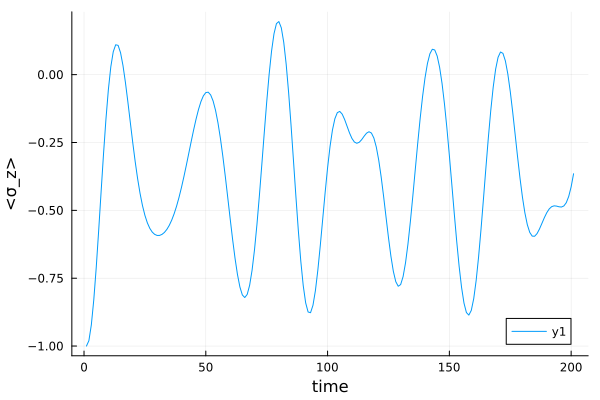

In [13]:
plot(exp_sz, xlabel="time", ylabel="<σ_z>")

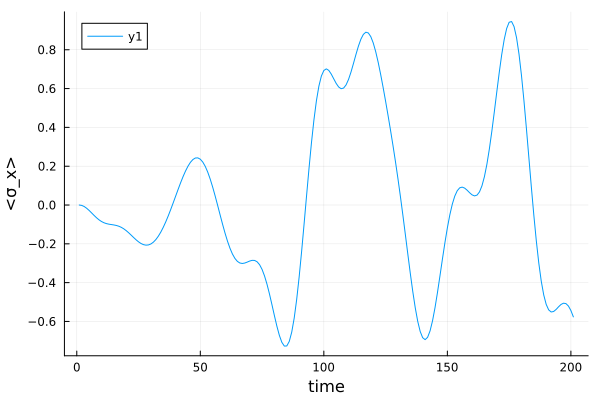

In [14]:
plot(exp_sx, xlabel="time", ylabel="<σ_x>")

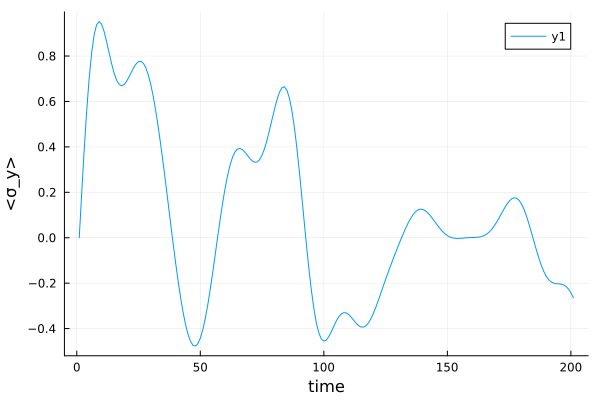

In [15]:
plot(exp_sy, xlabel="time", ylabel="<σ_y>")



